In [20]:
import numpy as np
from Trip import Trip
from Point import Point
from Trips import Trips
import math
import gurobipy as gb

In [ ]:
trip1=Trip([],[],2)
trip1.J.append(Point(1,1))
trip1.J.append(Point(2,2))
trip1.pi.append(Point(3,3))
trip1.pi.append(Point(4,4))

trip2=Trip([],[],2)
trip2.J.append(Point(5,5))
trip2.J.append(Point(6,6))
trip2.pi.append(Point(7,7))
trip2.pi.append(Point(8,8))

D=[]
D.append(Point(10,10))
D.append(Point(20,20))


print("trip1")
print(trip1)
print("trip2")
print(trip2)

n_actions=np.random.randint(0,5)

match n_actions:
    case 0:
        print("Swap two relocation moves between two taxi trips")
        # Swap two relocation moves between two taxi trips
        Trips.swap_random_realocation_moves(trip1,trip2)
        print("trip1")
        print(trip1)
        print("trip2")
        print(trip2)

    case 1:
        print("Move a relocation move to another taxi trip")
        # Move a relocation move to another taxi trip
        Trips.move_random_realocation_moves(trip1,trip2)
        print("trip1")
        print(trip1)
        print("trip2")
        print(trip2)

    case 2:
        print("Remove a drop-off point from a taxi trip")
        # Remove a drop-off point from a taxi trip
        Trips.remove_random_dropoff(trip1)
        print("trip")
        print(trip1)

    case 3:
        print("Swap two drop-off points between two taxi trips")
        # Swap two drop-off points between two taxi trips
        Trips.swap_random_dropoff(trip1,trip2)
        print("trip1")
        print(trip1)
        print("trip2")
        print(trip2)

    case 4:
        print("Add a drop-off point to a taxi trip")
        # Add a drop-off point to a taxi trip
        pi=np.random.choice(D, 1)[0]
        print("pi")
        print(pi)
        Trips.add_drop_off(trip1,pi)
        print("trip")
        print(trip1)


# SA

In [ ]:
n=10
m=1

J=[]
J.append(Point(1,1))
J.append(Point(2,2))
J.append(Point(3,3))
J.append(Point(4,4))
J.append(Point(5,5))
J.append(Point(6,6))
J.append(Point(7,7))
J.append(Point(8,8))

D=[]
D.append(Point(11,11))
D.append(Point(21,21))
D.append(Point(31,31))
D.append(Point(41,41))
D.append(Point(51,51))
D.append(Point(61,61))
D.append(Point(71,71))
D.append(Point(81,81))



n_trips=int(np.ceil(n/(np.ceil((m+1)/2))))
print(n_trips)
trips=[]
for i in range(n_trips):
    k=np.random.randint(1,m+1) # number of drop-off points
    print(f'k={k}')
    pi=np.random.choice(D, k,replace=False) #These drop-off points are randomly chosen

    # the relocation moves are randomly spread between the different trips.

    n_realocation_moves=int(len(J)/n_trips) # TODO we can improve using the normal distribution to select the right dimension

    J_prime=np.random.choice(J, n_realocation_moves,replace=False)
    if i==n_trips-1:
        J_prime=J.copy()
    for j in J_prime:
        J.remove(j)
    trip=Trip(J_prime,pi,k)
    trips.append(trip)


In [ ]:
print(trips)

In [ ]:
print(trips[1])

In [ ]:
print(trips[9])


In [ ]:
new_trips=trips.copy()

In [ ]:
print(new_trips)

In [ ]:
del new_trips[0]

In [ ]:
print(trips)

In [ ]:
print(new_trips)

In [ ]:
selected_indexes_trips=np.random.choice(range(len(new_trips)), 2,replace=False)
print(selected_indexes_trips)
trip1=new_trips[selected_indexes_trips[0]].copy()
trip2=new_trips[selected_indexes_trips[1]].copy()
f=[trip1,trip2]


print(f)
print(trip1)
print(trip2)

new_trips[selected_indexes_trips[0]]=trip1
new_trips[selected_indexes_trips[1]]=trip2

# exponential distribution


In [ ]:
z_new_trips=10
z_trips=5
T=50
exp_lambda= (z_new_trips-z_trips)/T
print(1/exp_lambda)

exponential_sample=np.random.exponential(1/exp_lambda) # TODO sistemare calcolo probabilità
print(exponential_sample)
trips=new_trips if exponential_sample<1/exp_lambda else trips # sc=sn if probability else sc

In [ ]:
# Using exponential() method
gfg = np.random.exponential(1/exp_lambda, 10000)

count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()


# Test copy

In [2]:
trip1=Trip([],[],2)
trip1.J.append(Point(1,1))
trip1.J.append(Point(2,2))
trip1.pi.append(Point(3,3))
trip1.pi.append(Point(4,4))


In [3]:
trip2=trip1.copy()


In [8]:
trip1.J


[<Point.Point at 0x1146657e0>, <Point.Point at 0x1146662c0>]

In [9]:
trip2.J


[<Point.Point at 0x114667280>, <Point.Point at 0x114664dc0>]

In [13]:
J=[Point(1,2),Point(2,3)]

for idx, x in enumerate(J):
    print(idx, x)


0 (1,2)
1 (2,3)


In [66]:
D=[]
D.append(Point(1,1))
D.append(Point(2,2))
D.append(Point(3,3))
D.append(Point(4,4))
D.append(Point(5,5))
D.append(Point(6,7))
D.append(Point(7,7))
D.append(Point(8,8))
realocation_moves=D

F=[]
F.append(Point(1,2))
F.append(Point(2,3))
F.append(Point(3,5))
F.append(Point(4,6))
F.append(Point(2,8))
F.append(Point(2,7))
F.append(Point(1,7))
F.append(Point(5,8))
drop_off_points=F

trips=[]
trips.append(Trip([Point(1,2),Point(3,4)],[Point(1,2),Point(3,4),Point(5,6)],3))
trips.append(Trip([Point(6,4)],[Point(5,6),Point(6,4),Point(3,6)],3))

trips.append(Trip([Point(3,2)],[Point(3,2),Point(5,4),Point(5,7)],3))

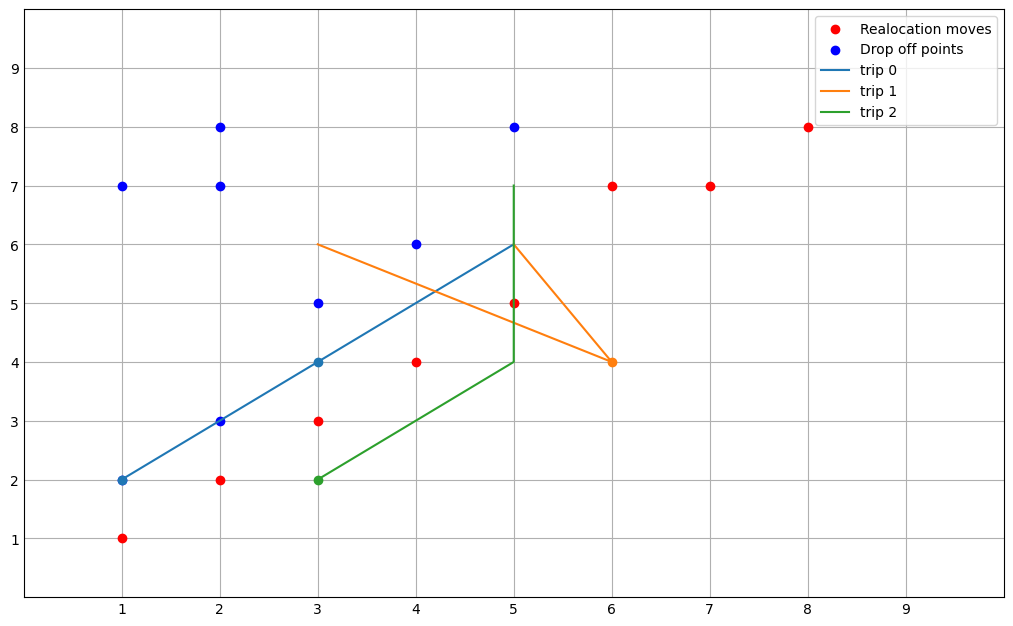

In [72]:
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
def plot_points(drop_off_points, realocation_moves,size=(10,6)):
    plt.style.use('_mpl-gallery')
    realocation_moves_x=[]
    realocation_moves_y=[]
    for point in realocation_moves:
        realocation_moves_x.append(point.u)
        realocation_moves_y.append(point.v)

    drop_off_points_x=[]
    drop_off_points_y=[]
    for drop_off in drop_off_points:
        drop_off_points_x.append(drop_off.u)
        drop_off_points_y.append(drop_off.v)

    # plot
    fig, ax = plt.subplots(figsize=(10,6),dpi=100)
    ax.scatter(realocation_moves_x, realocation_moves_y, c="r",label='Realocation moves')
    ax.scatter(drop_off_points_x, drop_off_points_y, c="b",label='Drop off points')
    # plot trips
    for idx,trip in enumerate(trips):
        colors = np.random.uniform(15, 80, len(x))
        trip_x=[]
        trip_y=[]
        for drop_off in trip.pi:
            trip_x.append(drop_off.u)
            trip_y.append(drop_off.v)
        ax.plot(trip_x,trip_y,'-',label=f'trip {idx}')
        color=ax.get_lines()[idx].get_color()
        for realocation_move in trip.J:
            ax.scatter(x=realocation_move.u, y=realocation_move.v,c=color)


    ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
           ylim=(0, 10), yticks=np.arange(1, 10))
    ax.legend()
    plt.show()
